# Air Quality Prediction Using Random Forest Regressor

- https://en.tutiempo.net/climate  Using this website builded the Webscrapping with the library of beautyfulsoup


In this Project Scrapping the data from the website and after taken data we calcluated the daily hours Air Qulaity data into daily average data of 2013 to 2017  for target value  PM2.5 after We Predicting the Air Quality using Ridge and Lasso Regression and also comparison between previous model Linear Regression and get which is the best for this usecase

Columns
- T	Average annual temperature
- TM	Annual average maximum temperature
- Tm	Average annual minimum temperature
- PP	Rain or snow precipitation total annual
- V	Annual average wind speed
- RA	Number of days with rain
- SN	Number of days with snow
- TS	Number of days with storm
- FG	Number of foggy days
- TN	Number of days with tornado
- GR	Number of days with hail

In [3]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing the data 
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [5]:
df.head()

T    TM   Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2  200.645833

<AxesSubplot:>

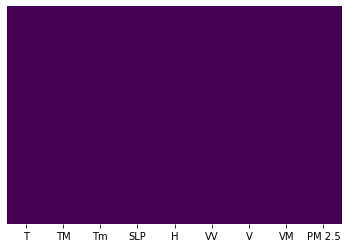

In [6]:
## Check for null values

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
# Drop the Null Values If incase dataset have but there is no null values thats good
df=df.dropna()

In [8]:
# Lets Assign the features into two types independent and dependent features
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [9]:
## check null values
X.isnull()

T     TM     Tm    SLP      H     VV      V     VM
0    False  False  False  False  False  False  False  False
1    False  False  False  False  False  False  False  False
2    False  False  False  False  False  False  False  False
3    False  False  False  False  False  False  False  False
4    False  False  False  False  False  False  False  False
..     ...    ...    ...    ...    ...    ...    ...    ...
726  False  False  False  False  False  False  False  False
727  False  False  False  False  False  False  False  False
728  False  False  False  False  False  False  False  False
729  False  False  False  False  False  False  False  False
730  False  False  False  False  False  False  False  False

[730 rows x 8 columns]

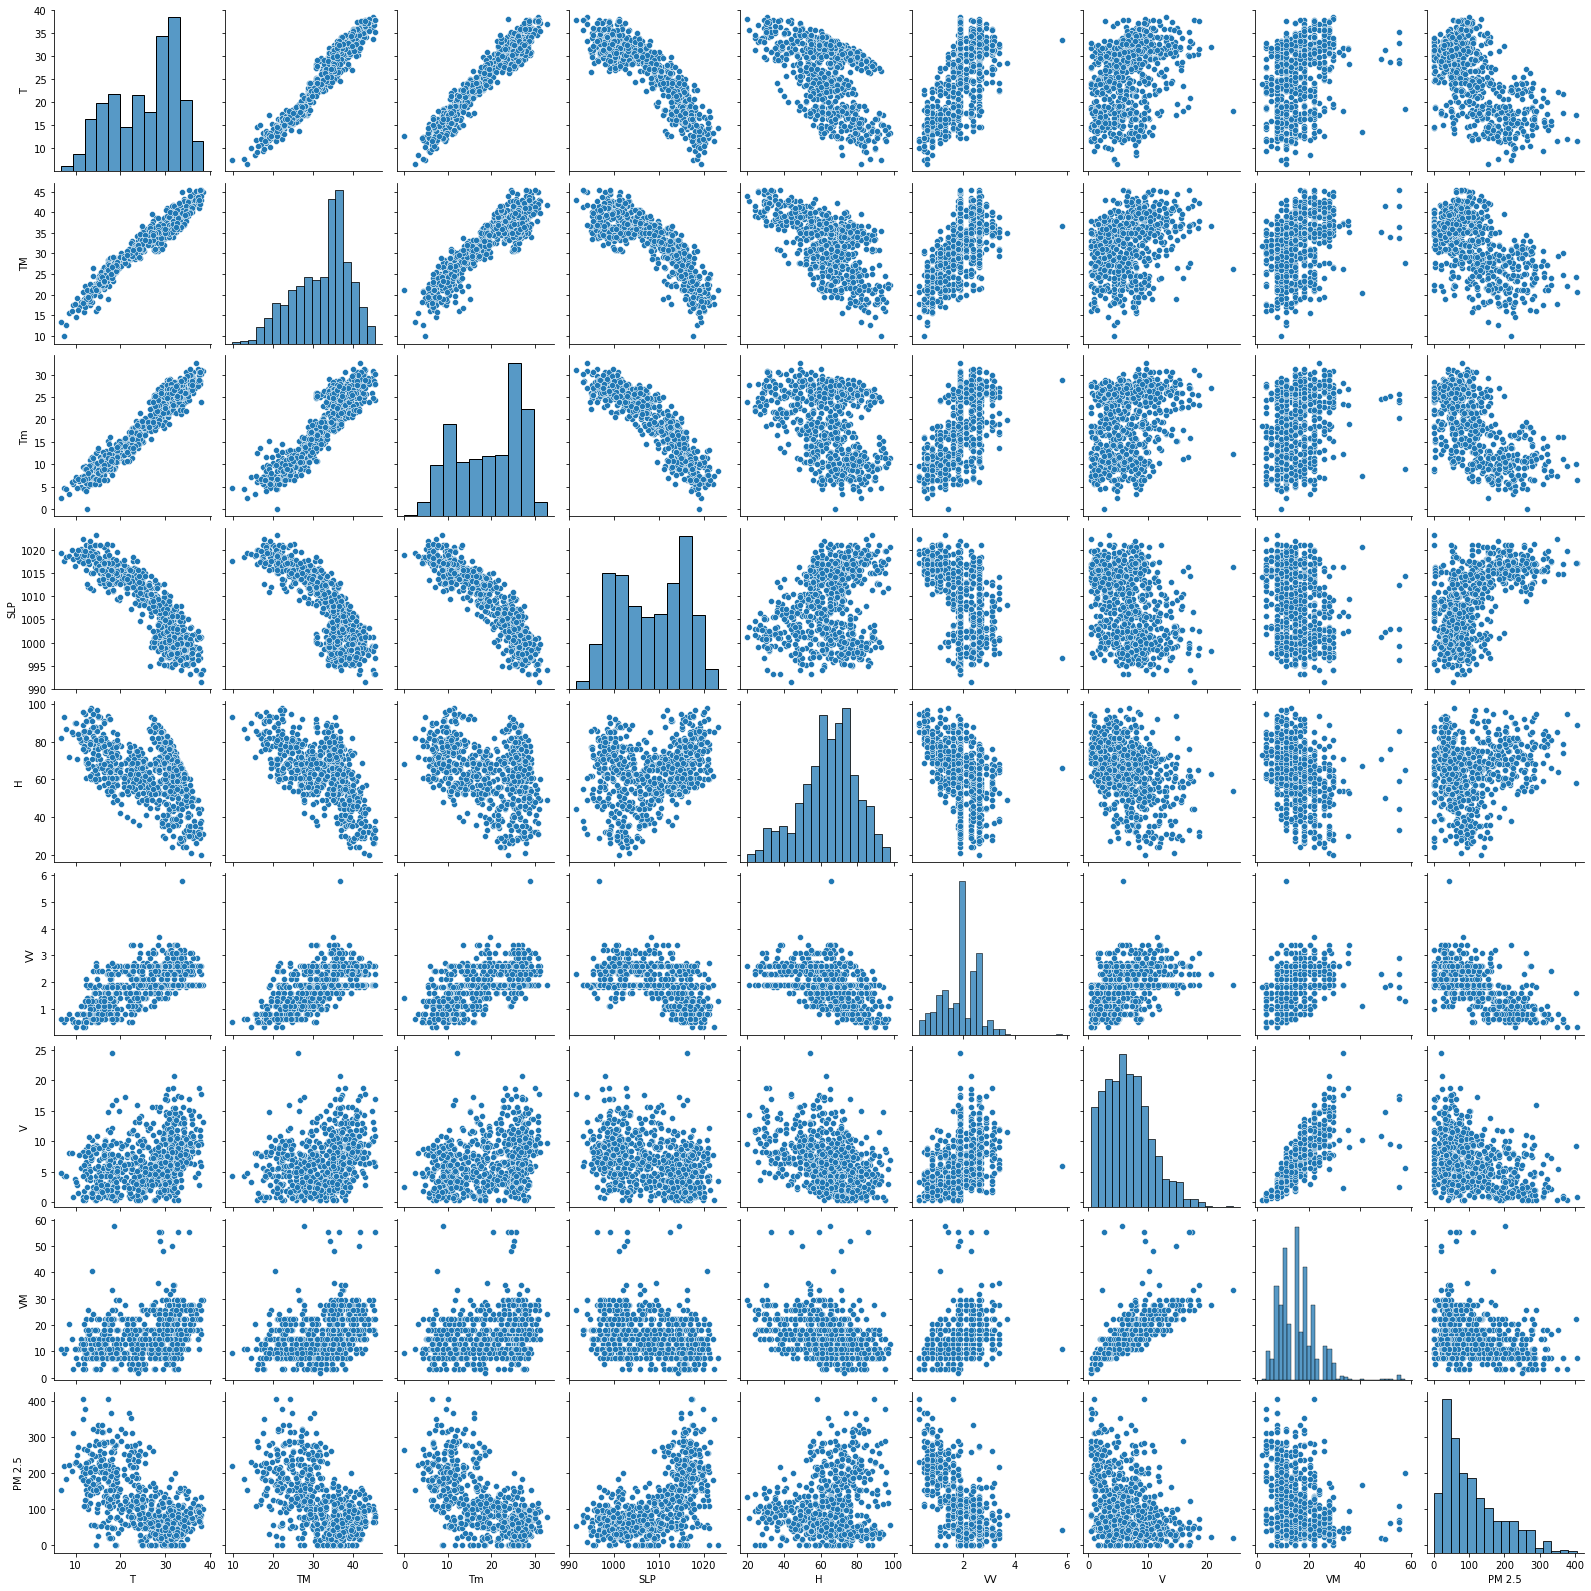

In [10]:
# Using seaborn checking the correlation between the features
sns.pairplot(df)

In [11]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967276  0.958892 -0.884383 -0.518870  0.622637  0.326067   
TM      0.967276  1.000000  0.896699 -0.829254 -0.599629  0.598479  0.320116   
Tm      0.958892  0.896699  1.000000 -0.909514 -0.315305  0.560299  0.312904   
SLP    -0.884383 -0.829254 -0.909514  1.000000  0.274196 -0.491842 -0.346130   
H      -0.518870 -0.599629 -0.315305  0.274196  1.000000 -0.475279 -0.399079   
VV      0.622637  0.598479  0.560299 -0.491842 -0.475279  1.000000  0.402884   
V       0.326067  0.320116  0.312904 -0.346130 -0.399079  0.402884  1.000000   
VM      0.287138  0.299508  0.259431 -0.299830 -0.370981  0.347493  0.760777   
PM 2.5 -0.628336 -0.569381 -0.669059  0.615615  0.174658 -0.628621 -0.354799   

              VM    PM 2.5  
T       0.287138 -0.628336  
TM      0.299508 -0.569381  
Tm      0.259431 -0.669059  
SLP    -0.299830  0.615615  
H      -0.370981  0.174658  
VV      0.347493 -0.628621  
V       0.760777 -0.354799  
VM      1.000000 -0.283695  
PM 2.5 -0.283695  1.000000

### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

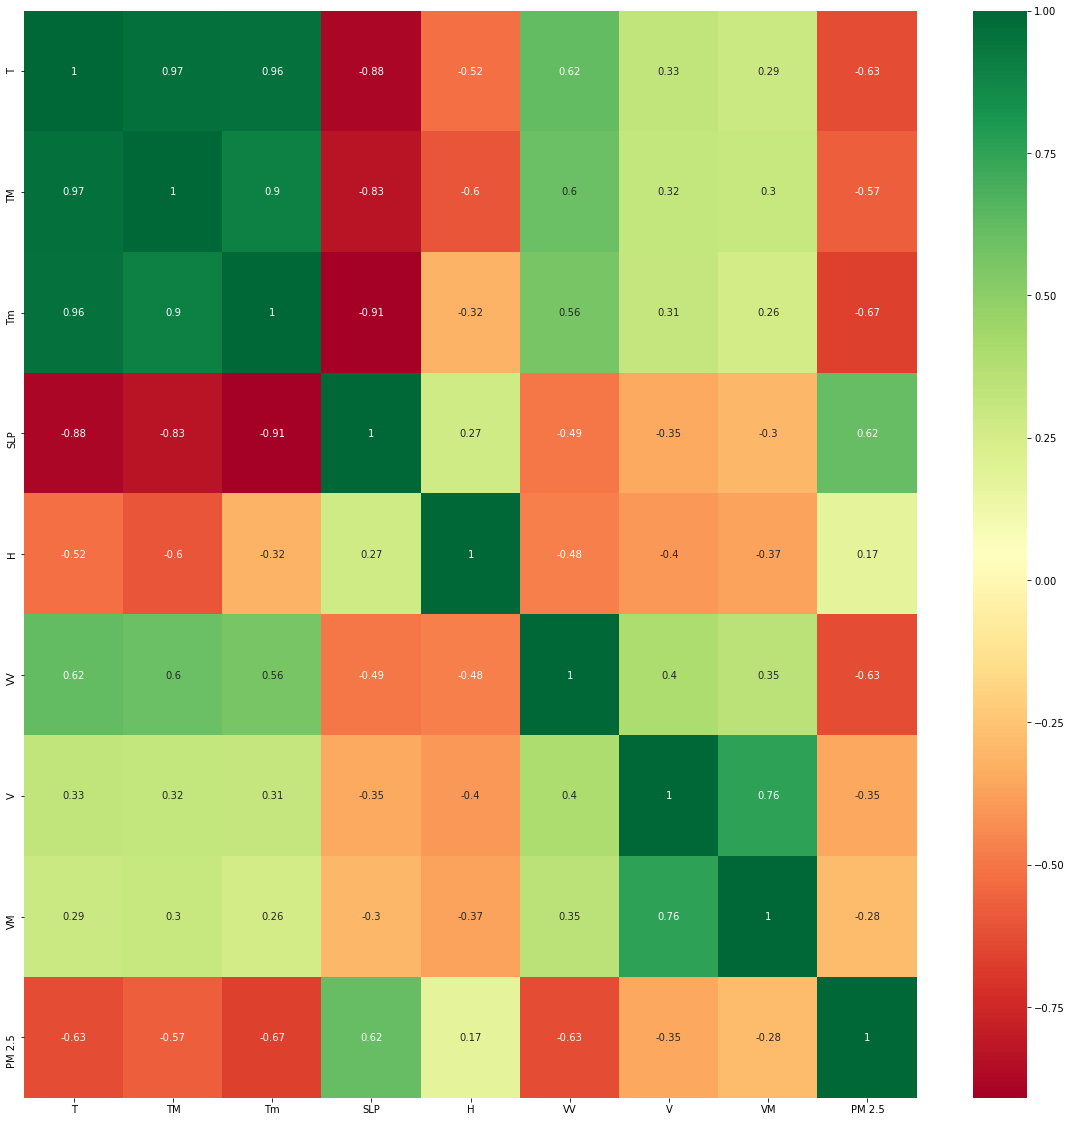

In [12]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [13]:
corrmat.index

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM', 'PM 2.5'], dtype='object')

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [14]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [15]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [16]:
print(model.feature_importances_)

[0.16551942 0.08216212 0.16301925 0.1473497  0.08227493 0.26895347
 0.05006245 0.04065865]


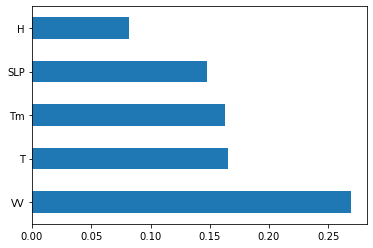

In [17]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [19]:
from sklearn.ensemble import RandomForestRegressor

In [20]:
regressor=RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [21]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9496279254105408


In [22]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6416633502174405


In [23]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [24]:
score.mean()

0.4966053874295168

### Model Evaluation

In [25]:
prediction=regressor.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

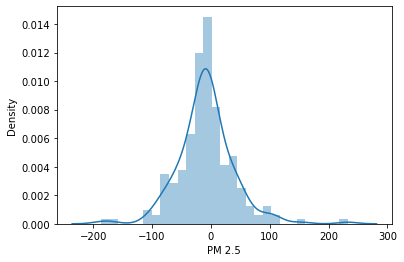

In [26]:
sns.distplot(y_test-prediction)

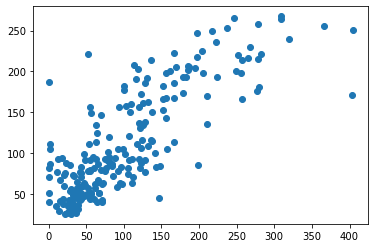

In [27]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning

In [28]:
RandomForestRegressor()

RandomForestRegressor()

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [31]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]



In [33]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [34]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [35]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [36]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_es

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=10, max_features

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   1.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   2.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   3.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   4.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END max_depth=15, max_feature

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   2.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   1.9s
[CV] END max_depth=10, max_

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.9s
[CV] END max_depth=30,

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.8s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   3.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_fe

[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   1.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END max_depth=10, m

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 1200,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 30}

In [38]:
rf_random.best_score_

-2597.451272451901

In [39]:
predictions=rf_random.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

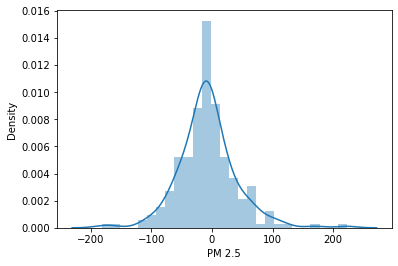

In [40]:
sns.distplot(y_test-predictions)

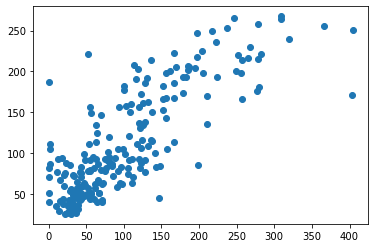

In [41]:
plt.scatter(y_test,prediction)

In [42]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 34.62934889724129
MSE: 2361.8363840357106
RMSE: 48.598728214179744


#  **Predictions For New Data**

In [53]:
# Creating a function for prediction
def predict_diabetes(T, TM, Tm, SLP, H, VV, V, VM):
    t = int(T)
    tm = float(TM)
    tmm = float(Tm)
    slp = float(SLP)
    h = float(H)
    vv = float(VV)
    v = float(V)
    vm = int(VM)

    x = [[t, tm, tmm, slp, h, vv, v, vm]]
    #x = sc.transform(x)

    return rf_random.predict(x)

In [61]:
# Prediction 1
# Input sequence: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DPF, Age
predictions = predict_diabetes(7.4, 9.8, 4.8, 1017.6, 93.0, 0.5, 4.3, 9.4)[0]
if predictions:
  print('PM 2.5 Value is :.' ,predictions)

PM 2.5 Value is :. 200.69591501817987


In [47]:
X.head()

T    TM   Tm     SLP     H   VV    V    VM
0   7.4   9.8  4.8  1017.6  93.0  0.5  4.3   9.4
1   7.8  12.7  4.4  1018.5  87.0  0.6  4.4  11.1
2   6.7  13.4  2.4  1019.4  82.0  0.6  4.8  11.1
3   8.6  15.5  3.3  1018.7  72.0  0.8  8.1  20.6
4  12.4  20.9  4.4  1017.3  61.0  1.3  8.7  22.2

In [62]:
import pickle 
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

# Xgboost Regressor

### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
import xgboost as xgb
#conda install -c ananconda py-xgboost

In [22]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [23]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9997842299242427


In [24]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6104024046485017


In [25]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [26]:
score.mean()

0.4545628713565547

### Model Evaluation 

In [27]:
prediction=regressor.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

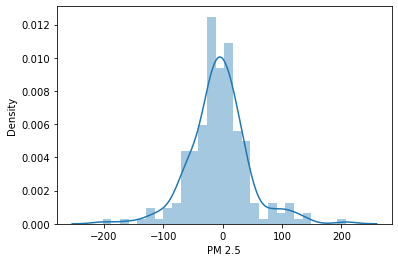

In [28]:
sns.distplot(y_test-prediction)

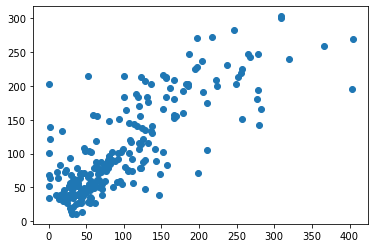

In [29]:
plt.scatter(y_test,prediction)

### Hyperparmater tunning

In [30]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [33]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]




In [34]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [35]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [36]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [37]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.1s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=6, n_estimators=1100, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=6, n_estimators=600, subsample=0.7; total time=   0.9s
[CV] END learning_ra

[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=7, n_estimators=1100, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.9s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=25, min_child_weight=5, n_estimators=800, subsample=0.6; total time=   1.0s
[CV] END learning_rate=0.1, max_depth=15, min_child_weight=7, n_estimators=600, subsa

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=1200, subsample=0.7; total time=   1.0s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=6, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.6, max_depth=25, min_child_weight=7, n_estimators=800, subsampl

[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.9s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   3.4s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   2.9s
[CV] END learning_rate=0.05, max_depth=30, min_child_weight=3, n_estimators=1100, subsample=0.8; total time=   3.5s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.2s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1200, subsample=0.6; total time=   1.4s
[CV] END learning_rate=0.2, max_depth=30, min_child_weight=5, n_estimators=1

[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.3, max_depth=10, min_child_weight=7, n_estimators=800, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=15, min_child_weight=6, n_estimators=300, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.3, max_depth=20, min_child_weight=5, n_estimators=300, sub

[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=25, min_child_weight=3, n_estimators=400, subsample=0.6; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsample=0.7; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=30, min_child_weight=3, n_estimators=900, subsampl

[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.3, max_depth=5, min_child_weight=4, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.5, max_depth=20, min_child_weight=3, n_estimators=800, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.6; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=6, n_estimators=900, subsample=0.

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=100, n_jobs=1,
                   par

In [38]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [39]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [40]:
xg_random.best_score_

-2641.43566254388

In [42]:
predictions=xg_random.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

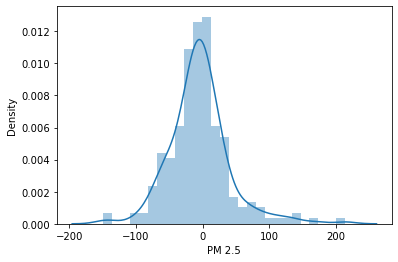

In [43]:
sns.distplot(y_test-predictions)

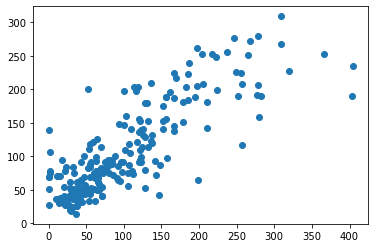

In [44]:
plt.scatter(y_test,predictions)

In [45]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31.900516810482497
MSE: 2118.728943566487
RMSE: 46.029652872539536


# KNN Regressor

## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
regressor=KNeighborsRegressor(n_neighbors=1)
regressor.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=1)

In [49]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [50]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: -0.08045200427243504


In [51]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [52]:
score.mean()

-0.12260548546487751

### Model Evaluation

In [53]:
prediction=regressor.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

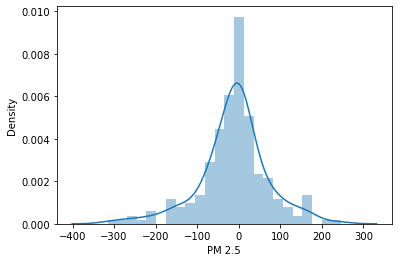

In [54]:
sns.distplot(y_test-prediction)

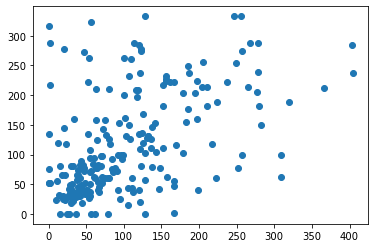

In [55]:
plt.scatter(y_test,prediction)

## Hyerparameter tunning 

In [56]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    score=cross_val_score(knn,X,y,cv=10,scoring="neg_mean_squared_error")
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

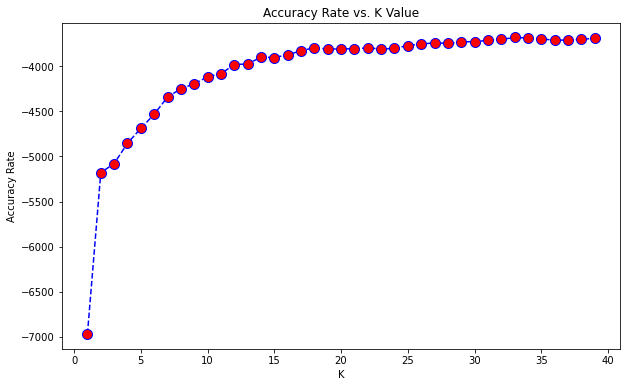

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
#plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
 #        markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

In [58]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=1)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

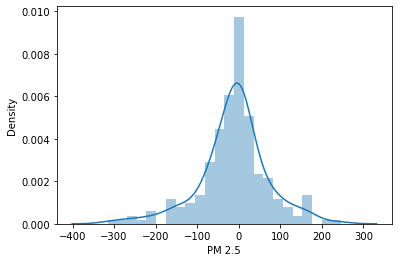

In [59]:
sns.distplot(y_test-predictions)

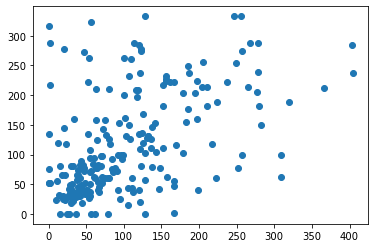

In [60]:
plt.scatter(y_test,predictions)

In [61]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 57.6355403348554
MSE: 7053.356899257989
RMSE: 83.98426578388353


In [70]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsRegressor(n_neighbors=3)

knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

/Users/anil/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

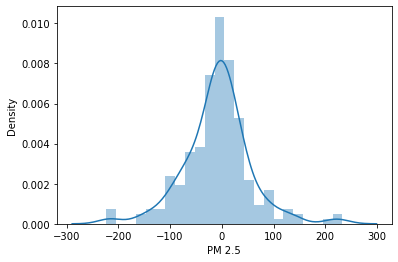

In [72]:
sns.distplot(y_test-predictions)

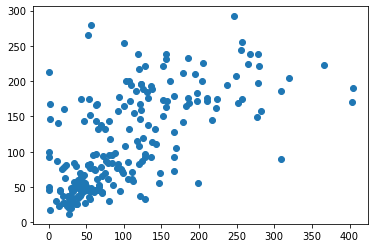

In [73]:
plt.scatter(y_test,predictions)

In [74]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 45.32886225266362
MSE: 4232.47184930626
RMSE: 65.05745037508203


In [2]:
import pickle
# open a file, where you ant to store the data
file = open('ridge_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(lasso_regressor, file)

NameError: name 'lasso_regressor' is not defined